In [ ]:
chapter15

In [81]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pylab
figsize = (11, 7)
pylab.rcParams['figure.figsize'] = figsize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
from systems.provided.futures_chapter15.basesystem import futures_system
from analysis import plotting
from sysdata.configdata import Config

In [35]:
vol_20_system = futures_system()
vol_20_system.accounts.portfolio().stats()

[[('min', '-0.764'),
  ('max', '0.1589'),
  ('median', '0'),
  ('mean', '0.0006711'),
  ('std', '0.02224'),
  ('skew', '-5.726'),
  ('ann_daily_mean', '0.1718'),
  ('ann_daily_std', '0.3559'),
  ('sharpe', '0.4827'),
  ('sortino', '0.4677'),
  ('avg_drawdown', '-0.339'),
  ('time_in_drawdown', '0.9864'),
  ('calmar', '0.1109'),
  ('avg_return_to_drawdown', '0.5068'),
  ('avg_loss', '-0.01581'),
  ('avg_gain', '0.01534'),
  ('gaintolossratio', '0.9702'),
  ('profitfactor', '1.113'),
  ('hitrate', '0.5343')],
 ('You can also plot:', ['rolling_ann_std', 'drawdown', 'curve']),
 ('You can also print:', ['weekly', 'monthly', 'annual'])]

In [33]:
vol_40_config = Config("systems.provided.futures_chapter15.futuresconfig.yaml")
vol_40_config.percentage_vol_target = 40
vol_40_system = futures_system(config=vol_40_config)
vol_40_system.accounts.portfolio().stats()

[[('min', '-1.528'),
  ('max', '0.3179'),
  ('median', '0'),
  ('mean', '0.001342'),
  ('std', '0.04448'),
  ('skew', '-5.726'),
  ('ann_daily_mean', '0.3436'),
  ('ann_daily_std', '0.7118'),
  ('sharpe', '0.4827'),
  ('sortino', '0.4677'),
  ('avg_drawdown', '-0.678'),
  ('time_in_drawdown', '0.9864'),
  ('calmar', '0.1109'),
  ('avg_return_to_drawdown', '0.5068'),
  ('avg_loss', '-0.03161'),
  ('avg_gain', '0.03067'),
  ('gaintolossratio', '0.9702'),
  ('profitfactor', '1.113'),
  ('hitrate', '0.5343')],
 ('You can also plot:', ['rolling_ann_std', 'drawdown', 'curve']),
 ('You can also print:', ['weekly', 'monthly', 'annual'])]

NonGuiException: 

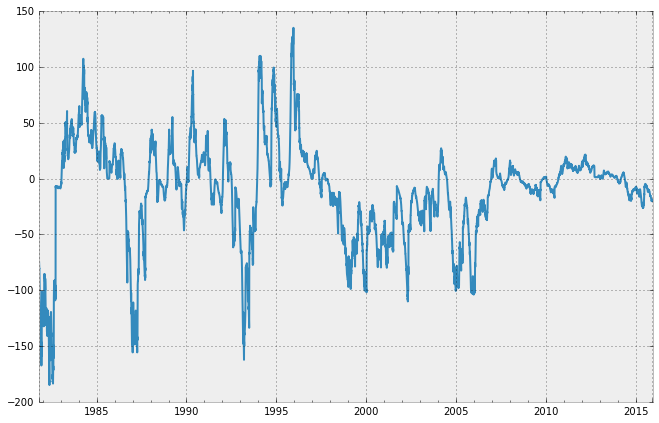

In [96]:
i = vol_40_system.portfolio.get_instrument_list()


instruments = i
instrument_list = []
for instrument in instruments:
    df = vol_40_system.portfolio.get_notional_position(instrument)
    df.columns = [instrument]
    instrument_list.append(df)
pd.concat(instrument_list, 1).plot()


In [90]:
vol_40_system.portfolio.get_notional_position('CORN')

> c:\dev\code\other\pysystemtrade\systems\portfolio.py(291)get_notional_position()
-> def _get_notional_position(system, instrument_code, this_stage):
(Pdb) q


BdbQuit: 

In [84]:
import systems

In [85]:
systems.__file__

'c:\\dev\\code\\other\\pysystemtrade\\systems\\__init__.py'

In [83]:
futures_system.__file__

AttributeError: 'function' object has no attribute '__file__'

In [89]:
vol_40_system.portfolio.get_notional_positions()

AttributeError: 'PortfoliosFixed' object has no attribute 'get_notional_positions'

In [63]:
vol_20_system.portfolio.get_instrument_list()

['CORN', 'EDOLLAR', 'EUROSTX', 'MXP', 'US10', 'V2X']

In [66]:
vol_20_system.positionSize.get_daily_cash_vol_target()

{'annual_cash_vol_target': 50000.0,
 'base_currency': 'USD',
 'daily_cash_vol_target': 3125.0,
 'notional_trading_capital': 250000.0,
 'percentage_vol_target': 20.0}

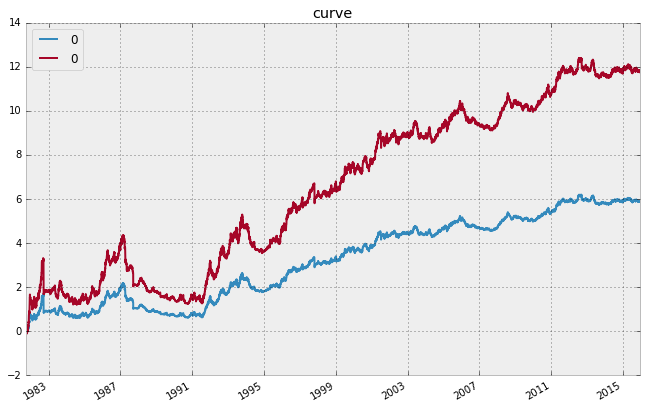

In [55]:
plotting.compare([vol_20_system, vol_40_system], 'curve')
None

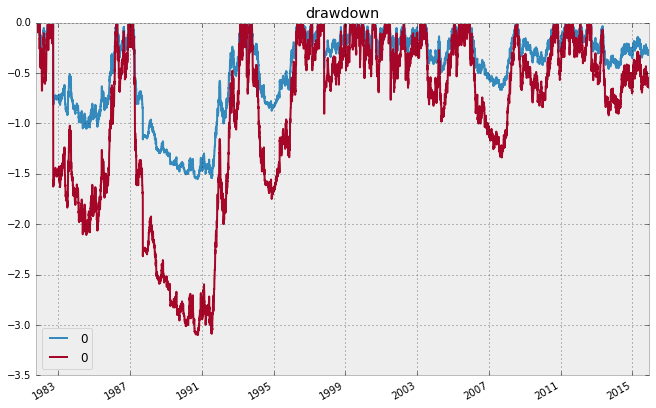

In [57]:
plotting.compare([vol_20_system, vol_40_system], 'drawdown')
None

In [67]:
plotting.

<module 'analysis.plotting' from 'c:\\dev\\code\\other\\pysystemtrade\\analysis\\plotting.py'>